In [338]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [339]:
workplace_df=pd.read_csv('survey.csv')

In [340]:
workplace_df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [341]:
def EDA(workplace_df):
    
    print('\033[1m' +'EXPLORATORY DATA ANALYSIS :'+ '\033[0m\n')
    print('\033[1m' + 'Shape of the data (rows, columns):' + '\033[0m')
    print(workplace_df.shape, 
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'All columns from the dataframe :' + '\033[0m')
    print(workplace_df.columns, 
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Datatpes and Missing values:' + '\033[0m')
    print(workplace_df.info(), 
          '\n------------------------------------------------------------------------------------\n')
    
    for col in workplace_df.columns:
        print('\033[1m' + 'Unique values in {} :'.format(col) + '\033[0m',len(workplace_df[col].unique()))
    print('\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Summary statistics for the data :' + '\033[0m')
    print(workplace_df.describe(include='all'), 
          '\n------------------------------------------------------------------------------------\n')
    
        
    print('\033[1m' + 'Memory used by the data :' + '\033[0m')
    print(workplace_df.memory_usage(), 
          '\n------------------------------------------------------------------------------------\n')
    
    print('\033[1m' + 'Number of duplicate values :' + '\033[0m')
    print(workplace_df.duplicated().sum())
          
EDA(workplace_df)

EXPLORATORY DATA ANALYSIS :

Shape of the data (rows, columns):
(1259, 27) 
------------------------------------------------------------------------------------

All columns from the dataframe :
Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object') 
------------------------------------------------------------------------------------

Datatpes and Missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------          

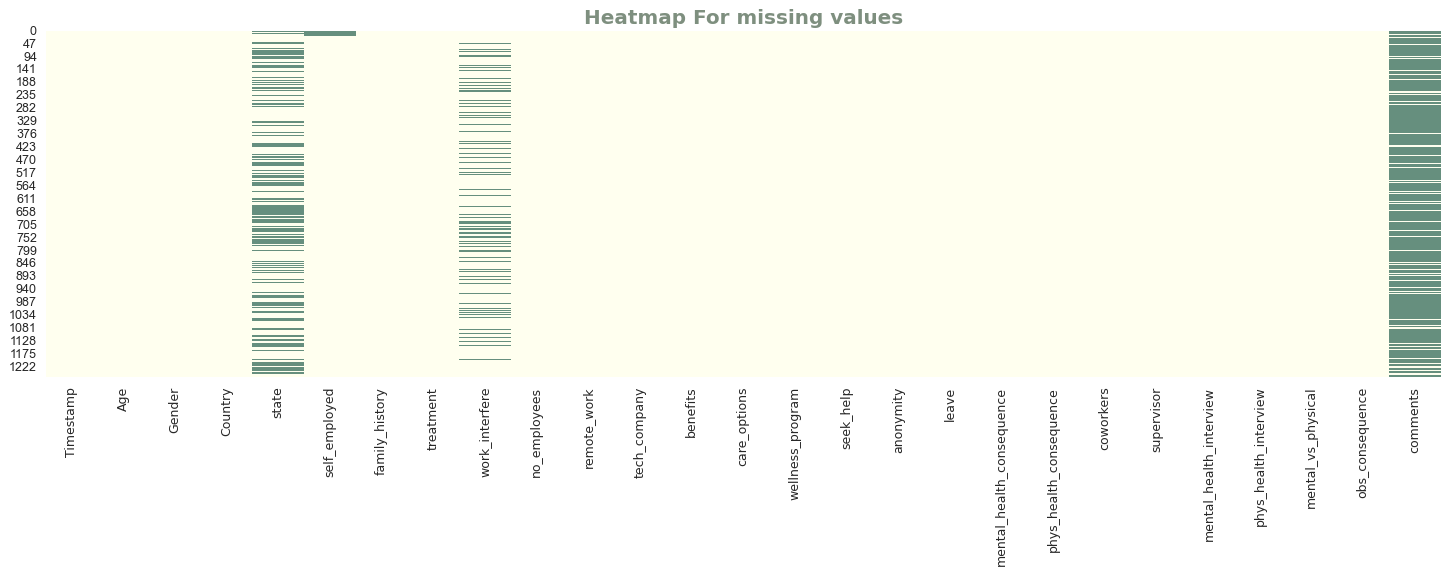

In [342]:
plt.figure(figsize=(20,5) , dpi=90)
sns.heatmap(workplace_df.isna(), cmap='YlGn', cbar = False, alpha = 0.6)
plt.xticks(rotation=90)
hfont = {'fontname':'bold'}
plt.title ('Heatmap For missing values',
           **hfont,
           color = '#29452a',
           weight = 'semibold',
           fontsize = 16,
           alpha = 0.6)
plt.xticks(**hfont)
plt.show()

In [343]:
cols = []
props = []
prop = {'Column' : cols, 'Missing_Proportion': props}
for col in workplace_df.columns:
    missing_prop = workplace_df[col].isna().sum() / workplace_df.shape[0] * 100
    if missing_prop > 0:
        cols.append(col)
        props.append(missing_prop)
 
prop = pd.DataFrame(prop).sort_values('Missing_Proportion', ignore_index=True)
prop.style.applymap(lambda x : "background-color: #eaedb4")

,Column,Missing_Proportion
0,self_employed,1.429706
1,work_interfere,20.969023
2,state,40.905481
3,comments,86.973789


In [344]:
print('\033[1m' + 'Total countries surveyed :' + '\033[0m', len(workplace_df.Country.value_counts()))
print('\033[1m' + 'Unique states in the Data :' + '\033[0m\n', workplace_df.state.unique())

Total countries surveyed : 48
Unique states in the Data :
 ['IL' 'IN' nan 'TX' 'TN' 'MI' 'OH' 'CA' 'CT' 'MD' 'NY' 'NC' 'MA' 'IA' 'PA'
 'WA' 'WI' 'UT' 'NM' 'OR' 'FL' 'MN' 'MO' 'AZ' 'CO' 'GA' 'DC' 'NE' 'WV'
 'OK' 'KS' 'VA' 'NH' 'KY' 'AL' 'NV' 'NJ' 'SC' 'VT' 'SD' 'ID' 'MS' 'RI'
 'WY' 'LA' 'ME']


In [345]:
#Dropping

workplace_df = workplace_df.drop(columns=['state', 'comments', 'Timestamp'])
print('\033[1m' + 'Columns in updated Dataframe :' + '\033[0m', len(df.columns))

Columns in updated Dataframe : 24


In [346]:
# Imputing

workplace_df['self_employed'] = workplace_df['self_employed']\
                      .fillna(pd.Series(np.random.choice(['Yes', 'No'], p=[0.117647, 0.882353], size=len(workplace_df))))

workplace_df['work_interfere'] = workplace_df['work_interfere']\
                      .fillna(pd.Series(np.random.choice(['Sometimes', 'Never', 'Rarely', 'Often']
                                                         , p=[0.467337, 0.214070, 0.173869, 0.144724], size=len(workplace_df))))

print('\033[1m' + 'Total empty values in the Dataset :' + '\033[0m' , workplace_df.isnull().sum().sum())

Total empty values in the Dataset : 0


In [347]:
# Feature engineering

age = []
for i in workplace_df.Age:
    if (i<18) or (i>99):
        age.append(31)   # Median
    else:
        age.append(i)

workplace_df['Age'] = age

other  = ['A little about you', 'p', 'Nah', 'Enby', 'Trans-female','something kinda male?','queer/she/they','non-binary','All','fluid', 'Genderqueer','Androgyne', 'Agender','Guy (-ish) ^_^', 'male leaning androgynous','Trans woman','Neuter', 'Female (trans)','queer','ostensibly male, unsure what that really means','trans']
male   = ['male', 'Male','M', 'm', 'Male-ish', 'maile','Cis Male','Mal', 'Male (CIS)','Make','Male ', 'Man', 'msle','cis male', 'Cis Man','Malr','Mail']
female = ['Female', 'female','Cis Female', 'F','f','Femake', 'woman','Female ','cis-female/femme','Female (cis)','femail','Woman','female']

workplace_df['Gender'].replace(to_replace = other, value = 'other', inplace=True)
workplace_df['Gender'].replace(to_replace = male, value = 'M', inplace=True)
workplace_df['Gender'].replace(to_replace = female, value = 'F', inplace=True)

print('\033[1m' + 'Unique values in updated Gender column :' + '\033[0m', workplace_df.Gender.unique())
print('\033[1m' + 'Range of column Age (Before) :' + '\033[0m', (workplace_df.Age.min(), workplace_df.Age.max()))
print('\033[1m' + 'Range of column Age :' + '\033[0m', (workplace_df.Age.min(), workplace_df.Age.max()))

Unique values in updated Gender column : ['F' 'M' 'other']
Range of column Age (Before) : (18, 72)
Range of column Age : (18, 72)


In [348]:
# Univariate visualization of categorical variables

workplace_df_ = workplace_df.drop(['Age', 'Country'], axis=1)

buttons = []
i = 0
vis = [False] * 24

for col in workplace_df_.columns:
    vis[i] = True
    buttons.append({'label' : col,
             'method' : 'update',
             'args'   : [{'visible' : vis},
             {'title'  : col}] })
    i+=1
    vis = [False] * 24

fig = go.Figure()

for col in workplace_df_.columns:
    fig.add_trace(go.Pie(
             values = workplace_df_[col].value_counts(),
             labels = workplace_df_[col].value_counts().index,
             title = dict(text = 'Distribution of {}'.format(col),
                          font = dict(size=20, family = 'bold'),
                          ),
             hole = 0.5,
             hoverinfo='label+percent',))

fig.update_traces(hoverinfo='label+percent',
                  textinfo='label+percent',
                  textfont_size=10,
                  opacity = 0.9,
                  showlegend = False,
                  marker = dict(colors = sns.color_palette('Blues').as_hex(),
                              line=dict(color='#111111', width=1)))
              

fig.update_layout(margin=dict(t=0, b=0, l=0, r=0),
                  updatemenus = [dict(
                        type = 'dropdown',
                        x = 1.15,
                        y = 0.85,
                        showactive = True,
                        active = 0,
                        buttons = buttons)],
                 annotations=[
                             dict(text = "<b>Choose<br>Column<b> : ",
                             showarrow=False,
                             x = 1.06, y = 0.92, yref = "paper", align = "left")])

for i in range(1,22):
    fig.data[i].visible = False

fig.show()

In [349]:
# Univariate visualization of non-categorical variables

fig = make_subplots(rows = 2, cols=1)

fig.append_trace(go.Bar(
                        y = workplace_df['Country'].value_counts(),
                        x = workplace_df['Country'].value_counts().index,
                        name = 'Observations from Countries (Log)',
                        text = workplace_df['Country'].value_counts(),
                        textfont = dict(size = 10,
                                        family = 'bold'),
                        textposition = 'outside',
                        marker=dict(color="#6aa87b")
                        ), row=1, col=1)

fig.append_trace(go.Histogram(
                        x = workplace_df['Age'],
                        nbinsx = 8,
                        text = ['16', '500', '562', '149', '26', '5', '1'],
                        marker =  dict(color="#6aa87b")),
                        row=2, col=1)


# For Subplot : 1

fig.update_xaxes(
        row=1, col=1,
        tickfont = dict(size=10, family = 'bold'),
        tickmode = 'array',
        ticktext = workplace_df['Country'].value_counts().index,
        tickangle = 60,
        ticklen = 6,
        showline = False,
        showgrid = False,
        ticks = 'outside')

fig.update_yaxes(type = 'log',
        row=1, col=1,
        tickfont = dict(size=15, family = 'bold'),
        tickmode = 'array',
        showline = False,
        showgrid = False,
        ticks = 'outside')

fig.update_traces(
                  marker_line_color='blue',
                  marker_line_width= 1.2,
                  opacity=0.6,
                  row = 1, col = 1)

fig.update_xaxes(range=[-1,48], row = 1, col = 1)

# For Subplot : 2

fig.update_xaxes(        
        title = dict(text = 'Age',
                     font = dict(size = 15,
                                 family = 'bold')),
        row=2, col=1,
        tickfont = dict(size=15, family = 'bold', color = 'black'),
        tickmode = 'array',
        ticktext = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79'],
        ticklen = 6,
        showline = False,
        showgrid = False,
        ticks = 'outside')

fig.update_yaxes(
        row=2, col=1,
        tickfont = dict(size=15, family = 'bold'),
        tickmode = 'array',
        showline = False,
        showgrid = False,
        ticks = 'outside')

fig.update_traces(
                  marker_line_color='blue',
                  marker_line_width = 2,
                  opacity = 0.6,
                  row = 2, col = 1)


fig.update_layout(height=1500, width=800,
                  title = dict(text = 'Univariate visualization of non-categorical variables<br>1. Observation from Countries(Log)<br>2. Ages Count',
                               x = 0.5,
                               font = dict(size = 15, color ='#27302a',
                               family = 'bold')),
                 
                showlegend = False)

fig.show()

In [350]:
prop = pd.DataFrame(workplace_df.Gender.value_counts(normalize=True))
prop.style.applymap(lambda x : "background-color: #eaedb4")

,Gender
M,0.787133
F,0.196187
other,0.016680


In [351]:
male_country   = workplace_df[workplace_df['Gender'] == 'M'][['Country', 'Gender']]
female_country = workplace_df[workplace_df['Gender'] == 'F'][['Country', 'Gender']]
male_country   = male_country.value_counts()
female_country = female_country.value_counts()

male_country   = pd.DataFrame(male_country).reset_index().rename(columns={0:'count'}).head(15)
female_country = pd.DataFrame(female_country).reset_index().rename(columns={0:'count'}).head(15)
male_country['count'] = male_country['count'] * -1

In [352]:
fig = make_subplots(rows=1, cols=2,
                    specs=[[{}, {}]],
                    shared_yaxes=True,
                    horizontal_spacing=0)

fig.append_trace(go.Bar(
                 y = male_country.Country,
                 x = male_country['count'],
                 text = male_country['count'],
                 textfont = dict(size = 10, color = 'Orange'),
                 textposition = 'outside',
                 name = 'Male responses',
                 marker_color='Orange',
                 orientation = 'h'),
                 row=1, col=1)

fig.append_trace(go.Bar(
                 y = male_country.Country,
                 x = female_country['count'],
                 text = female_country['count'],
                 textfont = dict(size = 10, color = 'Blue'),
                 textposition = 'outside',
                 name = 'Female responses',
                 marker_color='Blue',
                 orientation = 'h'),
                 row=1, col=2)


fig.update_xaxes(
        tickfont = dict(size=10),
        tickmode = 'array',
        ticklen = 5,
        showline = False,
        showgrid = False,
        ticks = 'outside')

fig.update_yaxes(showgrid=False,
                 categoryorder='total ascending',
                 ticksuffix=' ',
                 showline=False)

fig.update_layout(
                  font_family   = 'bold',
                  title         = dict(text = 'Gender of the survey respondents across Countries', x = 0.6),
                  margin        = dict(t=80, b=0, l=70, r=40),
                  hovermode     = "y unified",
                  plot_bgcolor  = '#edf2c7',
                  paper_bgcolor = '#edf2c7',
                  font          = dict(color='black'),
                  legend        = dict(orientation="h",
                                       yanchor="bottom", y=1,
                                       xanchor="center", x=0.5),
                  hoverlabel    = dict(bgcolor="#edf2c7", font_size=10, 
                                      font_family="bold"))


fig.show()

In [353]:
male   = workplace_df[workplace_df.Gender == 'M'].drop(['Gender', 'Age', 'Country'], axis=1)
female = workplace_df[workplace_df.Gender == 'F'].drop(['Gender', 'Age', 'Country'], axis=1)
other  = workplace_df[workplace_df.Gender == 'other'].drop(['Gender', 'Age', 'Country'], axis=1)

In [354]:
buttons = []
i = 0
vis = [False] * 21

for col in male.columns:
    vis[i] = True
    buttons.append({'label' : col,
             'method' : 'update',
             'args'   : [{'visible' : vis},
             {'title'  : col}] })
    i+=1
    vis = [False] * 21

fig = make_subplots(rows=1, cols=2,
                    specs=[[{'type':'domain'}, {'type':'domain'}]])

for col in male.columns:
    fig.add_trace(go.Pie(
             values = male[col].value_counts(),
             labels = male[col].value_counts().index,
             title = dict(text = 'Male distribution<br>of {}'.format(col),
                          font = dict(size=18, family = 'bold'),
                          ),
             hole = 0.5,
             hoverinfo='label+percent',),1,1)


for col in female.columns:
    fig.add_trace(go.Pie(
             values = female[col].value_counts(),
             labels = female[col].value_counts().index,
             title = dict(text = 'Female distribution<br>of {}'.format(col),
                          font = dict(size=20, family = 'bold'),
                          ),
             hole = 0.5,
             hoverinfo='label+percent',),1,2)

fig.update_traces(hoverinfo='label+percent',
                  textinfo='label+percent',
                  textfont_size=12,
                  opacity = 0.9,
                  showlegend = False,
                  marker = dict(colors = sns.color_palette('Reds').as_hex(),
                              line=dict(color='#000000', width=1)))

fig.update_traces(row=1, col=2, hoverinfo='label+percent',
                  textinfo='label+percent',
                  textfont_size=12,
                  opacity = 0.9,
                  showlegend = False,
                  marker = dict(colors = sns.color_palette('Purples').as_hex(),
                              line=dict(color='#000000', width=1)))
              

fig.update_layout(margin=dict(t=0, b=0, l=0, r=0),
                  font_family   = 'bold',
                  updatemenus = [dict(
                        type = 'dropdown',
                        x = 0.62,
                        y = 0.91,
                        showactive = True,
                        active = 0,
                        buttons = buttons)],
                 annotations=[
                             dict(text = "<b>Choose<br>Column<b> : ",
                                  font = dict(size = 14),
                             showarrow=False,
                             x = 0.5, y = 1, yref = "paper", align = "left")])

for i in range(1,42):
    fig.data[i].visible = False
fig.data[21].visible = True

fig.show()

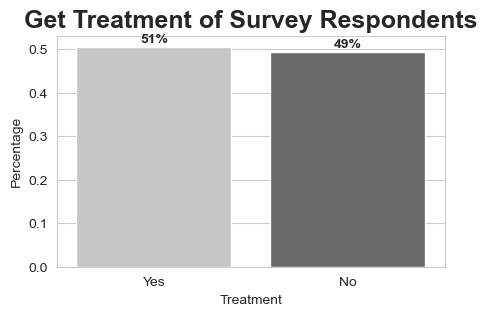

In [355]:
sns.set_style("whitegrid")
plt.figure(figsize = (5,3))
plt.title('Get Treatment of Survey Respondents', fontsize=18, fontweight='bold')
eda_percentage = workplace_df['treatment'].value_counts(normalize = True).rename_axis('Treatment').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'Treatment', y = 'Percentage', data = eda_percentage.head(10), palette='Greys')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


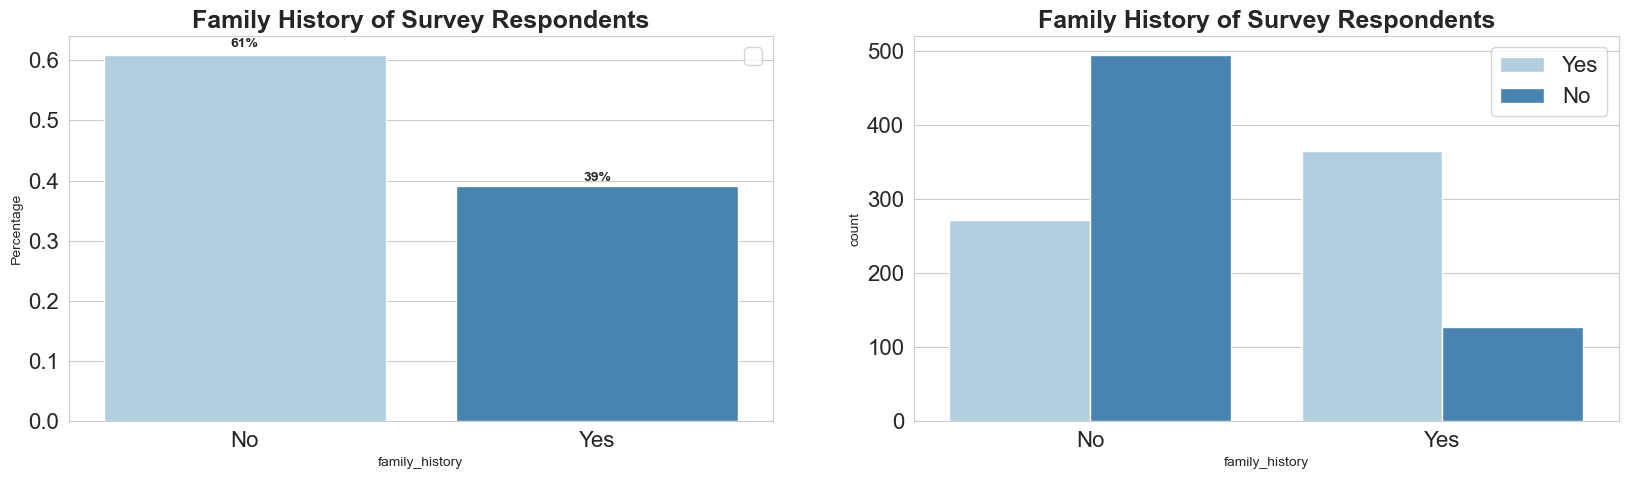

In [356]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = workplace_df['family_history'].value_counts(normalize = True).rename_axis('family_history').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'family_history', y = 'Percentage', data = eda_percentage, palette='Blues')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Family History of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(workplace_df['family_history'], hue = workplace_df['treatment'], palette='Blues')
plt.title('Family History of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


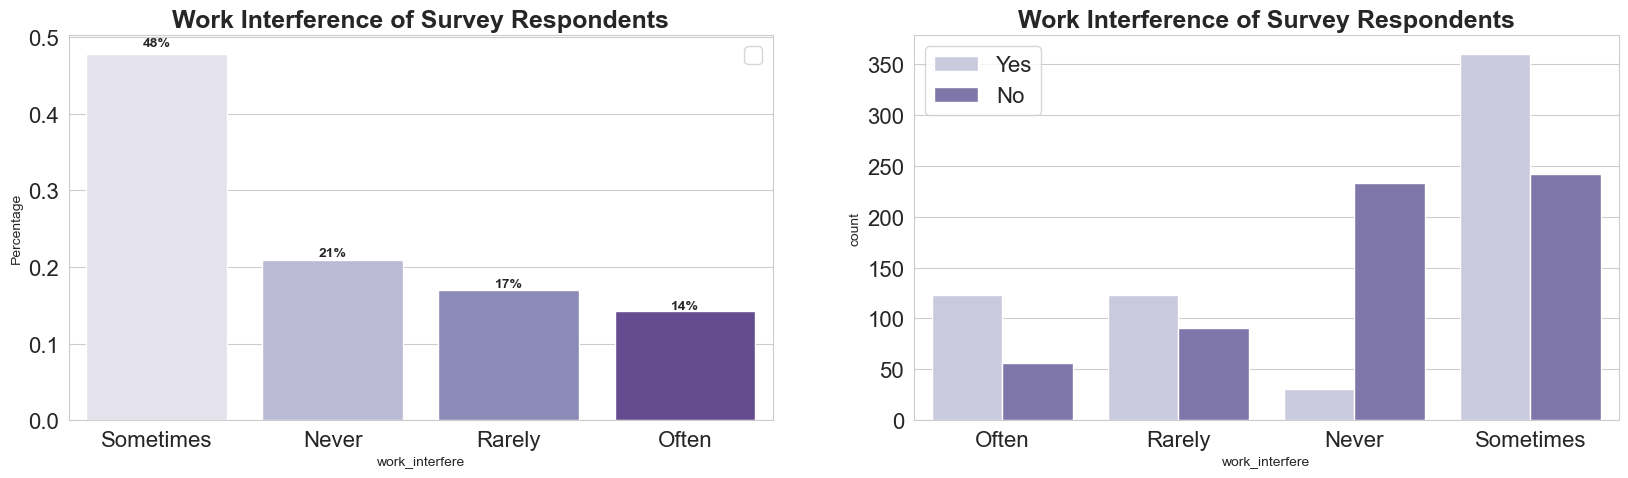

In [357]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = workplace_df['work_interfere'].value_counts(normalize = True).rename_axis('work_interfere').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'work_interfere', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Work Interference of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(workplace_df['work_interfere'], hue = workplace_df['treatment'], palette = 'Purples')
plt.title('Work Interference of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


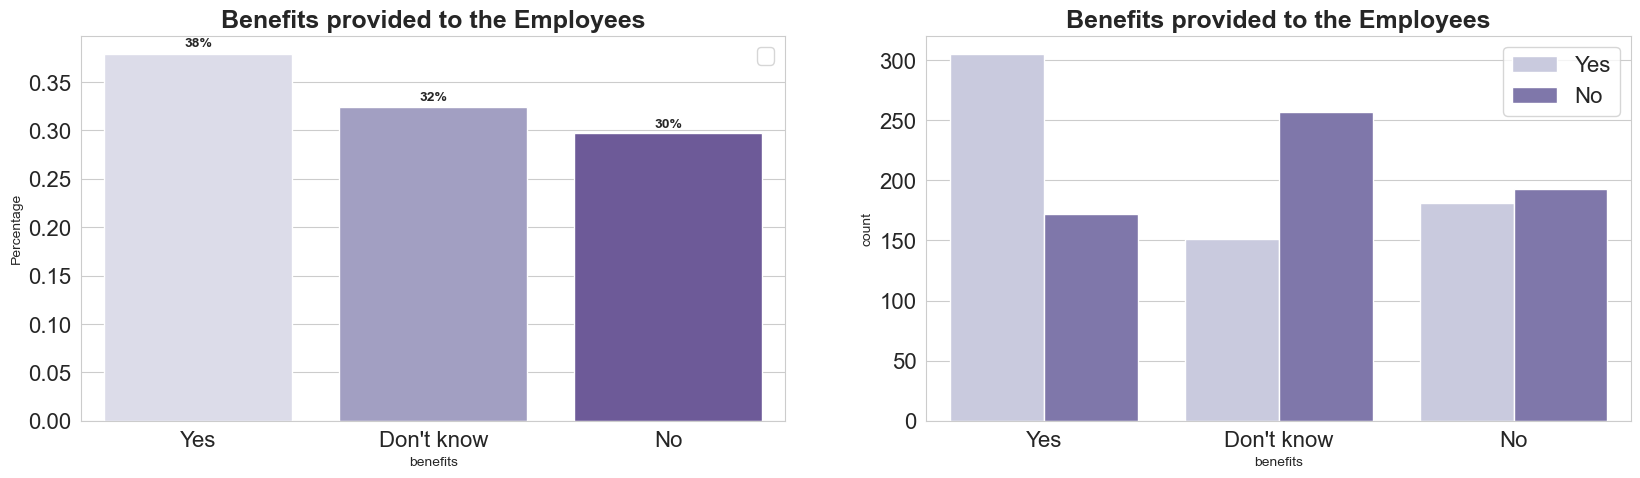

In [358]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
eda_percentage = workplace_df['benefits'].value_counts(normalize = True).rename_axis('benefits').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'benefits', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Benefits provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(workplace_df['benefits'], hue = workplace_df['treatment'], palette='Purples')
plt.title('Benefits provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In [359]:
# Choosing countries with more than 30 observations

us = workplace_df[workplace_df.Country == 'United States'].drop(['Age', 'Country'], axis=1)
uk = workplace_df[workplace_df.Country == 'United Kingdom'].drop(['Age', 'Country'], axis=1)
cd = workplace_df[workplace_df.Country == 'Canada'].drop(['Age', 'Country'], axis=1)
gr = workplace_df[workplace_df.Country == 'Germany'].drop(['Age', 'Country'], axis=1)

In [360]:
buttons = []
i = 0
vis = [False] * 22

for col in us.columns:
    vis[i] = True
    buttons.append({'label' : col,
             'method' : 'update',
             'args'   : [{'visible' : vis},
             {'title'  : col}] })
    i+=1
    vis = [False] * 22

fig = make_subplots(rows=2, cols=2,
                    specs=[[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]],
                    vertical_spacing = 0.1)

for col in us.columns:
    fig.add_trace(go.Pie(
             values = us[col].value_counts(),
             labels = us[col].value_counts().index,
             title = dict(text = 'U.S. distribution<br>of {}'.format(col),
                          font = dict(size=18, family = 'bold'),
                          ),
             hole = 0.5,
             hoverinfo='label+percent',),1,1)
    
for col in uk.columns:
    fig.add_trace(go.Pie(
             values = uk[col].value_counts(),
             labels = uk[col].value_counts().index,
             title = dict(text = 'U.K. distribution<br>of {}'.format(col),
                          font = dict(size=18, family = 'bold'),
                          ),
             hole = 0.5,
             hoverinfo='label+percent',),1,2)


for col in cd.columns:
    fig.add_trace(go.Pie(
             values = cd[col].value_counts(),
             labels = cd[col].value_counts().index,
             title = dict(text = 'Canada distribution<br>of {}'.format(col),
                          font = dict(size=18, family = 'bold'),
                          ),
             hole = 0.5,
             hoverinfo='label+percent',),2,1)
    
for col in gr.columns:
    fig.add_trace(go.Pie(
             values = gr[col].value_counts(),
             labels = gr[col].value_counts().index,
             title = dict(text = 'Germany distribution<br>of {}'.format(col),
                          font = dict(size=18, family = 'bold'),
                          ),
             hole = 0.5,
             hoverinfo='label+percent',),2,2)

fig.update_traces(hoverinfo='label+percent',
                  textinfo='label+percent',
                  textfont_size=12,
                  opacity = 0.9,
                  showlegend = False,
                  marker = dict(colors = sns.color_palette('Oranges').as_hex(),
                              line=dict(color='#000000', width=1)))

fig.update_traces(row=2, col=1, hoverinfo='label+percent',
                  textinfo='label+percent',
                  textfont_size=12,
                  opacity = 0.9,
                  showlegend = False,
                  marker = dict(colors = sns.color_palette('Greys').as_hex(),
                              line=dict(color='#000000', width=1)))

fig.update_traces(row=2, col=2, hoverinfo='label+percent',
                  textinfo='label+percent',
                  textfont_size=12,
                  opacity = 0.9,
                  showlegend = False,
                  marker = dict(colors = sns.color_palette('Greys').as_hex(),
                              line=dict(color='#000000', width=1)))
              

fig.update_layout(margin=dict(t=0, b=0, l=0, r=0),
                   paper_bgcolor = '#edf2c7',
                  height = 1000,
                  font_family   = 'bold',
                  updatemenus = [dict(
                        type = 'dropdown',
                        x = 0.60,
                        y = 0.96,
                        showactive = True,
                        active = 0,
                        buttons = buttons)],
                 annotations=[
                             dict(text = "<b>Choose<br>Column<b> : ",
                                  font = dict(size = 15),
                             showarrow=False,
                             x = 0.48, y = 1, yref = "paper", align = "left")])

for i in range(0,88):
    fig.data[i].visible = False

fig.data[0].visible = True
fig.data[22].visible = True
fig.data[44].visible = True
fig.data[66].visible = True

fig.show()

In [361]:
seek = workplace_df[workplace_df.treatment == 'Yes'].drop(['treatment', 'Country', 'Age'], axis=1)
dont = workplace_df[workplace_df.treatment == 'No'].drop(['treatment', 'Country', 'Age'], axis=1)

In [362]:
buttons = []
i = 0
vis = [False] * 21

for col in seek.columns:
    vis[i] = True
    buttons.append({'label' : col,
             'method' : 'update',
             'args'   : [{'visible' : vis},
             {'title'  : col}] })
    i+=1
    vis = [False] * 21

fig = make_subplots(rows=1, cols=2,
                    specs=[[{'type':'domain'}, {'type':'domain'}]])

for col in dont.columns:
    fig.add_trace(go.Pie(
             values = dont[col].value_counts(),
             labels = dont[col].value_counts().index,
             title = dict(text = 'No Treatment: <br>Distribution<br>of {}'.format(col),
                          font = dict(size=18, family = 'bold'),
                          ),
             hole = 0.5,
             hoverinfo='label+percent',),1,1)


for col in seek.columns:
    fig.add_trace(go.Pie(
             values = seek[col].value_counts(),
             labels = seek[col].value_counts().index,
             title = dict(text = 'Seek Treatment: <br>Distribution<br>of {}'.format(col),
                          font = dict(size=18, family = 'bold'),
                          ),
             hole = 0.5,
             hoverinfo='label+percent',),1,2)

fig.update_traces(hoverinfo='label+percent',
                  textinfo='label+percent',
                  textfont_size=12,
                  opacity = 0.8,
                  showlegend = False,
                  marker = dict(colors = sns.color_palette('Reds').as_hex(),
                              line=dict(color='#000000', width=1)))

fig.update_traces(row=1, col=2, hoverinfo='label+percent',
                  textinfo='label+percent',
                  textfont_size=12,
                  opacity = 0.8,
                  showlegend = False,
                  marker = dict(colors = sns.color_palette('Purples').as_hex(),
                              line=dict(color='#000000', width=1)))
              

fig.update_layout(margin=dict(t=0, b=0, l=0, r=0),
                  font_family   = 'bold',
                  updatemenus = [dict(
                        type = 'dropdown',
                        x = 0.60,
                        y = 0.95,
                        showactive = True,
                        active = 0,
                        buttons = buttons)],
                 annotations=[
                             dict(text = "<b>Choose<br>Column<b> : ",
                                  font = dict(size = 15),
                             showarrow=False,
                             x = 0.5, y = 1.03, yref = "paper", align = "left")])

for i in range(1,42):
    fig.data[i].visible = False
fig.data[21].visible = True

fig.show()

In [363]:
# Encoding Target

workplace_df.treatment = workplace_df.treatment.astype('category')
workplace_df.treatment = workplace_df.treatment.cat.codes
workplace_df.treatment.value_counts()



# Train and Test set

X = workplace_df.drop('treatment', axis =1)
y = workplace_df.treatment

cols = X.columns

encoder = LabelEncoder()
for col in cols:
    encoder.fit(X[col])
    X[col] = encoder.transform(X[col])

# Splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 39)


Best parameters :  {'log_reg__C': 0.01, 'log_reg__penalty': 'l2', 'log_reg__solver': 'newton-cg'}
Accuracy : 71.03%
Classification report : 
               precision    recall  f1-score   support

           0       0.69      0.71      0.70       120
           1       0.73      0.71      0.72       132

    accuracy                           0.71       252
   macro avg       0.71      0.71      0.71       252
weighted avg       0.71      0.71      0.71       252

Confusion Matrix : 


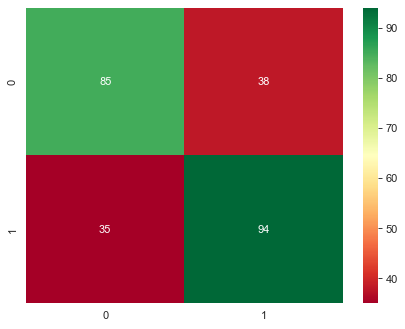

In [364]:
from warnings import filterwarnings
filterwarnings("ignore")

steps = [('scaler', StandardScaler()),
         ('log_reg', LogisticRegression())]

pipeline = Pipeline(steps)

parameters = dict(log_reg__solver = ['newton-cg', 'lbfgs', 'liblinear'],
                  log_reg__penalty =  ['l2'],
                  log_reg__C = [100, 10, 1.0, 0.1, 0.01])


cv = GridSearchCV(pipeline,
                  param_grid = parameters,
                  cv = 5,
                  scoring = 'accuracy',
                  n_jobs = -1,
                  error_score = 0.0)

cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)
log_accuracy = accuracy_score(y_pred, y_test) * 100

print('\033[1m' +'Best parameters : '+ '\033[0m', cv.best_params_)
print('\033[1m' +'Accuracy : {:.2f}%'.format(log_accuracy) + '\033[0m')
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred))

cm = confusion_matrix(y_pred, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
plt.figure(dpi=80)
sns.heatmap(cm, cmap = 'RdYlGn',annot = True, fmt='d')
plt.show()